## Build Convolutional Neural Network using Keras with MNIST Fashion Dataset



In [ ]:
#import libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#import MNIST fashion dataset
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
len(X_train), len(X_test)

(60000, 10000)

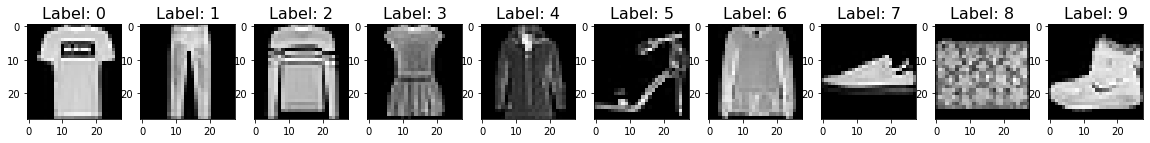

In [ ]:
#show images in dataset labeled 0 to 9 in gray
num_class = 10

f, ax = plt.subplots(1, num_class, figsize=(20, 20))

for i in range(0, num_class):
  sample = X_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [ ]:
#reshaping and normalizing
X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

X_train, X_test = X_train / 255., X_test / 255.

In [ ]:
#build model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
#compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#fit model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 60s 31ms/step - loss: 0.4973 - accuracy: 0.8176
Epoch 2/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.3242 - accuracy: 0.8820
Epoch 3/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2741 - accuracy: 0.8995
Epoch 4/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.2459 - accuracy: 0.9093
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2193 - accuracy: 0.9182
Epoch 6/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1995 - accuracy: 0.9252
Epoch 7/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1818 - accuracy: 0.9318
Epoch 8/10
1875/1875 [==============================] - 61s 32ms/step - loss: 0.1641 - accuracy: 0.9387
Epoch 9/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.1537 - accuracy: 0.9425
Epoch 10/10
1875/1875 [==============================] - 64s 34m

In [ ]:
#evaluate model
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=1)

313/313 [==============================] - 4s 12ms/step - loss: 0.2789 - accuracy: 0.9082
